# Import Libararies

In [3]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support as score
import seaborn as sb
import time
import colorama
from colorama import Fore

# Load test dataset

In [4]:
x_test=pickle.load(open('x_test4.pkl','rb'))
y_test=pickle.load(open('y_test4.pkl','rb'))

# Load saved NN model

In [5]:
model=tf.keras.models.load_model(os.path.join(os.getcwd(),"ULT_CT_XRAY_CONV_ULTIMATE"))

# Test the model on an unseen dataset

In [4]:
loss,win=model.evaluate(x_test,y_test)
print('===============================================================================')
print(Fore.RED+ ' Accuracy is : {}%'.format(round(win*100,2)))


119/119 [==============================] - 8s 48ms/step - loss: 0.1143 - acc: 0.9593
 Accuracy is : 95.93%


# Confusion Matrix 

C:\Users\omara\anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


True


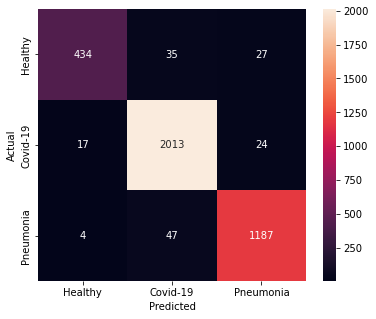

In [7]:
singlepredict=[]
singletest=[]
predict=model.predict([x_test])
tf.config.run_functions_eagerly(True)
print(tf.executing_eagerly())
singlepredict=np.argmax(predict,1) 
singletest=np.array(y_test)
plt.figure(figsize=(6,5))
confusion=tf.math.confusion_matrix(labels=singletest, predictions=singlepredict).numpy()
#plt.imshow(confusion) # Green Confusion Matrix
sb.heatmap(confusion , annot=True , xticklabels=['Healthy' , 'Covid-19','Pneumonia'] , yticklabels=['Healthy' , 'Covid-19','Pneumonia'],fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Metrics

In [6]:
precision, recall, f1, _ = score(singletest, singlepredict)
print(Fore.RED +'Average Precision: {}%'.format(round(sum(precision)/len(precision)*100,2)))
print(Fore.RED +'Average Recall: {}%'.format(round(sum(recall)/len(recall)*100,2)))
print(Fore.RED +'Average F-score: {}%'.format(round(sum(f1)/len(f1)*100,2)))


Average Precision: 95.78%
Average Recall: 93.79%
Average F-score: 94.73%


In [7]:
precision, recall, f1, _ = score(singletest, singlepredict)
print(Fore.RED +'Average Precision: {}%'.format(precision))
print(Fore.RED +'Average Recall: {}%'.format(recall))
print(Fore.RED +'Average F-score: {}%'.format(f1))


Average Precision: [0.95384615 0.96085919 0.95880452]%
Average Recall: [0.875      0.98003895 0.95880452]%
Average F-score: [0.91272345 0.9703543  0.95880452]%


# Examples of previously unseen CT and CXR images to test the model (Predicting 30 cases)

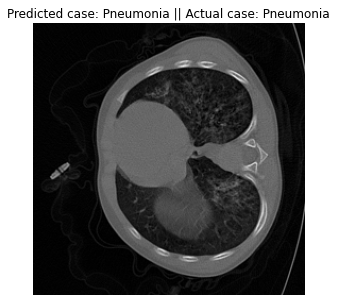

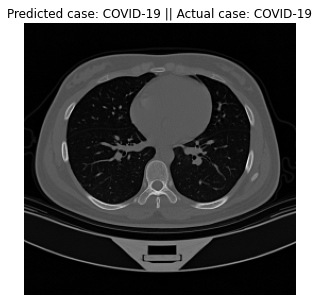

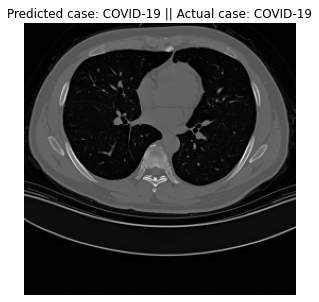

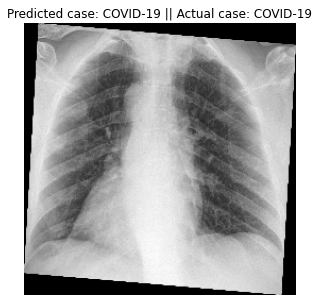

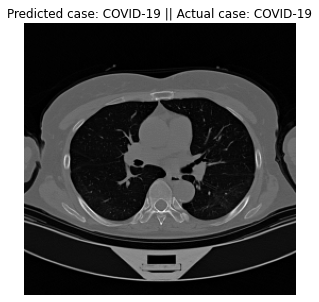

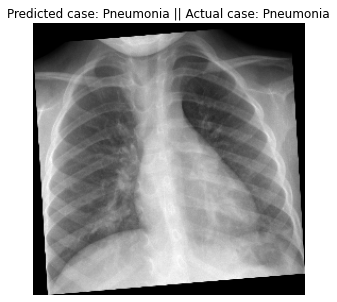

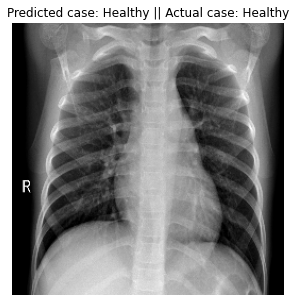

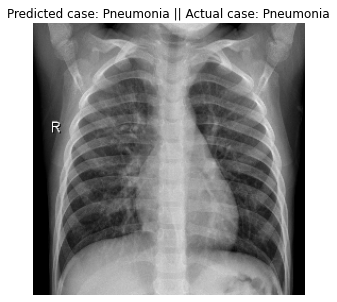

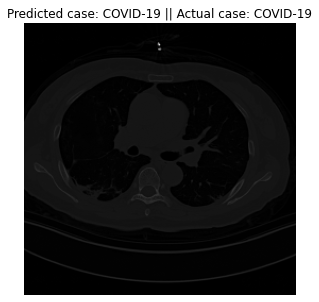

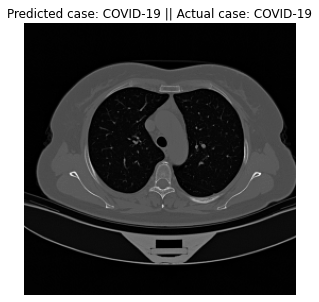

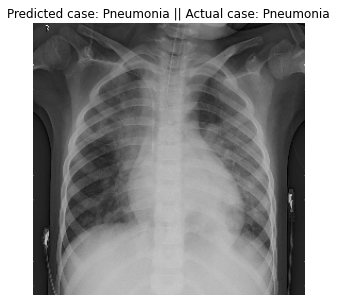

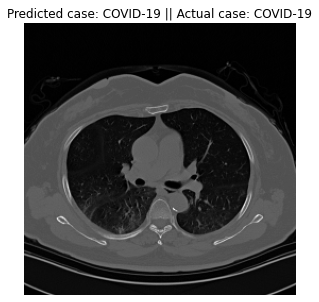

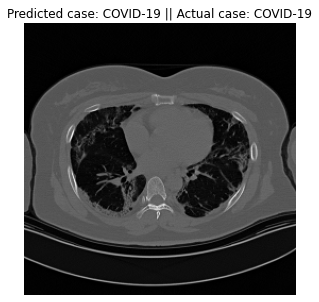

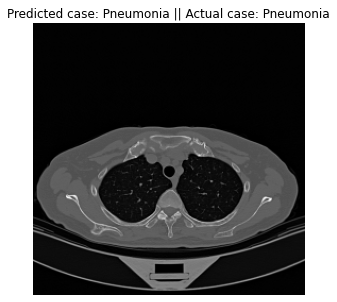

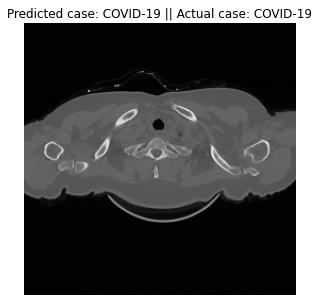

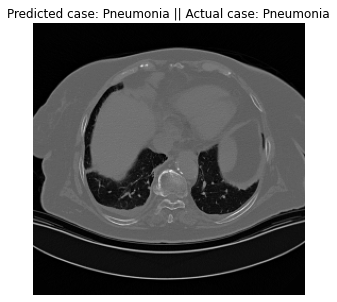

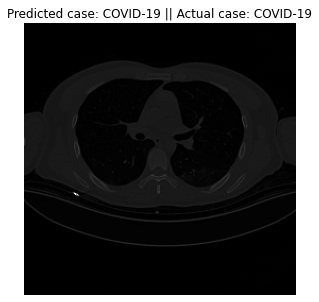

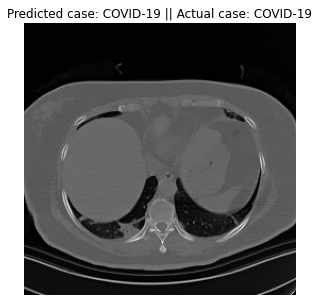

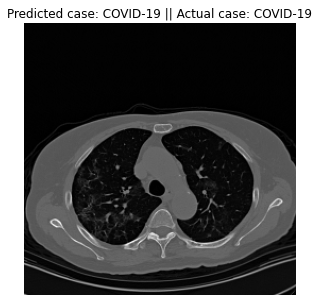

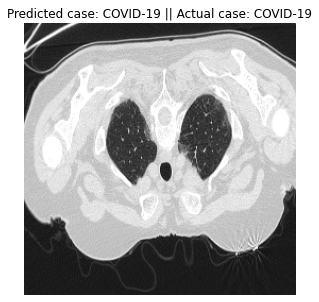

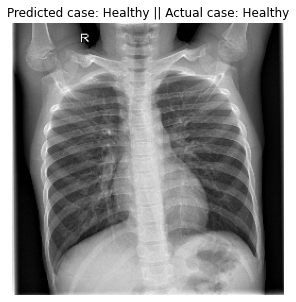

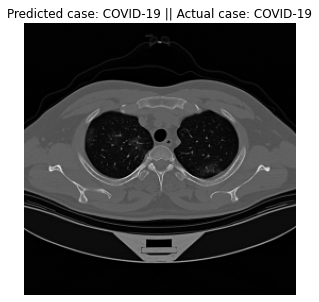

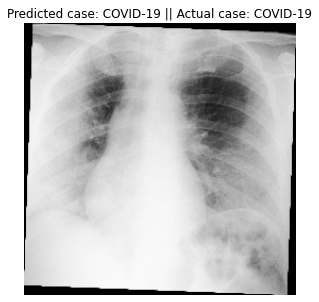

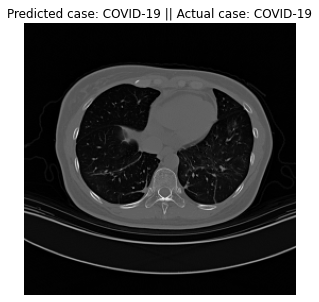

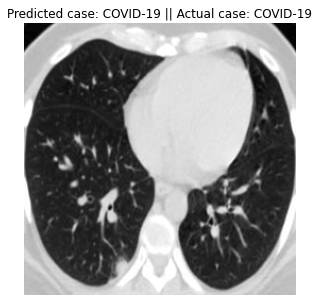

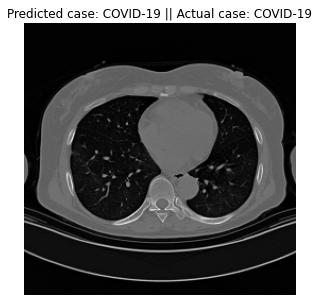

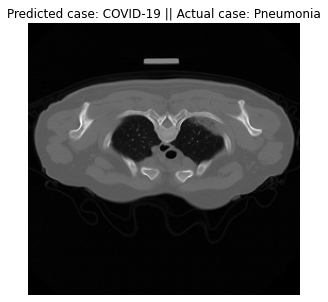

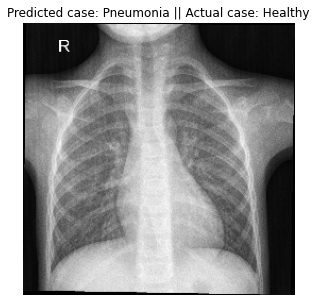

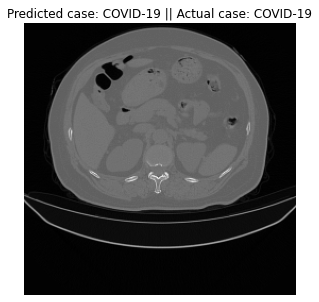

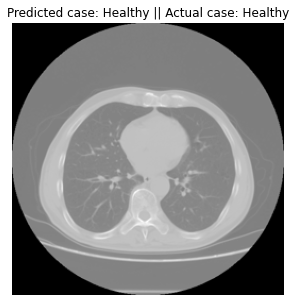

In [7]:
def simpleargmax(n):
    if list(n).index(max(n))==0:
        return "Healthy"
    elif list(n).index(max(n))==1:
        return "COVID-19"
    else:
        return "Pneumonia"
def label(m):
    if m==0:
        return "Healthy"
    elif m==1:
        return "COVID-19"
    else:
        return "Pneumonia"
for i in range(30):
    plt.figure(figsize = (5,5))
    val=random.randint(0,len(x_test)-1)
    plt.axis("off")
    plt.imshow(x_test[val], cmap='gray')
    plt.title("Predicted case: {} || Actual case: {}".format(simpleargmax(predict[val]),label(y_test[val])))
    plt.show()
    time.sleep(2)